In [1]:
# Import the necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk

In [2]:
#Download additional Python NLTK packages/modules
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
     "maxent_ne_chunker",
     "words",
 ])
# nltk.download('svgling')

[nltk_data] Downloading package names to C:\Users\Samuel
[nltk_data]     M\.conda\envs\New_Python_Environment\lib\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Samuel
[nltk_data]     M\.conda\envs\New_Python_Environment\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to C:\Users\Samuel
[nltk_data]     M\.conda\envs\New_Python_Environment\lib\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to C:\Users\Samuel
[nltk_data]     M\.conda\envs\New_Python_Environment\lib\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Samuel
[nltk_data]     M\.conda\envs\New_Python_Environment\lib\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_ta

True

In [3]:
# Read in the dataset and list the personality types.
df = pd.read_csv('MBTI 500.csv')
df.describe()

,posts,type
count,106067,106067
unique,106067,16
top,know intj tool use interaction people excuse a...,INTP
freq,1,24961


In [4]:
# Get the unique list of personality types from the dataset.
personality_types = df['type'].unique()
for p in personality_types:
    print(p)

INTJ
INTP
ISFJ
ISFP
ISTJ
ISTP
ENFJ
ENFP
ENTJ
ENTP
ESFJ
ESFP
ESTJ
ESTP
INFJ
INFP


In [5]:
# Iterate through the dataset to find one post from each personality type.
# Index corresponding to each row in the dataset.
index = 0
# Create a dictionary to hold dynamic list of dataframes.
# One dataframe will be created for each personality type found in the dataset.
pt_dict ={}

for p in personality_types:
    while(df['type'][index] != p):
        index = index + 1
    # Assign the name of personality type to the key.
    key = p
    # Assign post to new dataframe with name of personality type.
    df1 = df['posts'][index]
    # Add the key-value pair to the dictionary.
    pt_dict[key] = df1
    # Print values and increment index by one.
    print('Personality Type =', p, sep=' ')
    print('Index =', index, sep=' ')
    print(df['posts'][index], '\n')
    index = index + 1

Personality Type = INTJ
Index = 0
know intj tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad intj u stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like u specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition

Personality Type = ENFP
Index = 55114
terminal chance affirmation quality touch first one wow even research mbti cognitive function way offensive light read topic insuing te user introduction cognitive function te v ti te edit format one thing pretty well get bore think would rather position id say creativity associate think foot see shounen protags actually se trait se possibly hungry experience ne plus know ne type would patience stay day practice technique become strong require much engagement messy detail like compare naruto someone like anne green gable enfp anne live world symbol say hello moon name place play game pretend romanticize everything naruto see point stuff like either tangible real thing want moment food impress crush get strong actually go see thing esfj enfp infps enfj infjs weirdly enough female except infjs male one boyfriend well even though nothing existential exploration development like know smug shit hear enfps love attention dream explore intrigue hi seem en

In [6]:
pt_dict['INTP']

'watch bite everything include hentai tend enjoy jav large woman quite bbw though watch anything focus whatever shitty fake facial expression girl make ah sure se work type intp play role organize memory database among thing course silly white knight love people intp intj quite different intp use introvert think primary cognitive function intj use introvert intuition primary secondary function shadow function think wizard deal magical theory ritual funny clothe get cool fast car explode watch well guess could explode watch goal explode purpose pronounce name th aethyr wrong watch occuation mar midnight likely unhappy hide moreso actual weight gain intp also give lose weight feel comfortable weight attractive trait also moreso actual weight gain intp pirate downside well exactly throw inner barometer sense bear safety net totally fe like sink take depress labyrinth journey get back mentally emotionally stable state expect strudel get live make look sticky moderator care expect u moderat

In [7]:
# VADER Sentiment Scoring
# Doesnt account for relationships between words

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [8]:
sia.polarity_scores(pt_dict['INTP'])

{'neg': 0.119, 'neu': 0.553, 'pos': 0.327, 'compound': 0.9992}

In [9]:
for key in pt_dict:
    print('Sentiment Analysis for specific post for', key)
    print(sia.polarity_scores(pt_dict[key]))

Sentiment Analysis for specific post for INTJ
{'neg': 0.094, 'neu': 0.703, 'pos': 0.203, 'compound': 0.9948}
Sentiment Analysis for specific post for INTP
{'neg': 0.119, 'neu': 0.553, 'pos': 0.327, 'compound': 0.9992}
Sentiment Analysis for specific post for ISFJ
{'neg': 0.122, 'neu': 0.61, 'pos': 0.268, 'compound': 0.998}
Sentiment Analysis for specific post for ISFP
{'neg': 0.094, 'neu': 0.598, 'pos': 0.309, 'compound': 0.999}
Sentiment Analysis for specific post for ISTJ
{'neg': 0.139, 'neu': 0.606, 'pos': 0.256, 'compound': 0.997}
Sentiment Analysis for specific post for ISTP
{'neg': 0.114, 'neu': 0.682, 'pos': 0.204, 'compound': 0.9939}
Sentiment Analysis for specific post for ENFJ
{'neg': 0.125, 'neu': 0.546, 'pos': 0.329, 'compound': 0.9991}
Sentiment Analysis for specific post for ENFP
{'neg': 0.2, 'neu': 0.542, 'pos': 0.258, 'compound': 0.9882}
Sentiment Analysis for specific post for ENTJ
{'neg': 0.114, 'neu': 0.661, 'pos': 0.225, 'compound': 0.9967}
Sentiment Analysis for sp

In [10]:
# Function to compute VADER Sentiment Analysis value for the posts.

def vaderize(df, textfield):
    '''Compute the Vader polarity scores for a textfield.
    Returns scores and original dataframe.'''

    analyzer = SentimentIntensityAnalyzer()

    print('Estimating polarity scores for %d cases.' % len(df))
    sentiment = df[textfield].apply(analyzer.polarity_scores)

    # convert to dataframe
    sdf = pd.DataFrame(sentiment.tolist()).add_prefix('vader_')

    # merge dataframes
    df_combined = pd.concat([df, sdf], axis=1)
    return df_combined

In [11]:
# Compute the sentiment analysis for all of the posts for all 16 personality types for whole dataset.
# Construct new dataframe for each 16 personality types to add additional column with the sentiment score for each post.

#Make copy of the original dataframe.
new_df2 = df.copy()

# Get the unique list of personality types from the dataset.
personality_types2 = new_df2['type'].unique()

# One dataframe will be created for each personality type found in the dataset.
new_pt_df1 = new_df2[new_df2['type'] == 'INTJ']
new_pt_df2 = new_df2[new_df2['type'] == 'INTP']
new_pt_df3 = new_df2[new_df2['type'] == 'ISFJ']
new_pt_df4 = new_df2[new_df2['type'] == 'ISFP']
new_pt_df5 = new_df2[new_df2['type'] == 'ISTJ']
new_pt_df6 = new_df2[new_df2['type'] == 'ISTP']
new_pt_df7 = new_df2[new_df2['type'] == 'ENFJ']
new_pt_df8 = new_df2[new_df2['type'] == 'ENFP']
new_pt_df9 = new_df2[new_df2['type'] == 'ENTJ']
new_pt_df10 = new_df2[new_df2['type'] == 'ENTP']
new_pt_df11 = new_df2[new_df2['type'] == 'ESFJ']
new_pt_df12 = new_df2[new_df2['type'] == 'ESFP']
new_pt_df13 = new_df2[new_df2['type'] == 'ESTJ']
new_pt_df14 = new_df2[new_df2['type'] == 'ESTP']
new_pt_df15 = new_df2[new_df2['type'] == 'INFJ']
new_pt_df16 = new_df2[new_df2['type'] == 'INFP']

# Reset index values to start from zero through dataframe size n-1
series_list = []

def new_series_for_df(dfsize):
    i = 0
    series_list = []
    for i in range(dfsize):
        series_list.append(i)
    return series_list

new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df1)))
new_pt_df1.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df2)))
new_pt_df2.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df3)))
new_pt_df3.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df4)))
new_pt_df4.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df5)))
new_pt_df5.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df6)))
new_pt_df6.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df7)))
new_pt_df7.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df8)))
new_pt_df8.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df9)))
new_pt_df9.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df10)))
new_pt_df10.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df11)))
new_pt_df11.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df12)))
new_pt_df12.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df13)))
new_pt_df13.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df14)))
new_pt_df14.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df15)))
new_pt_df15.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd.Series(new_series_for_df(len(new_pt_df16)))
new_pt_df16.set_index(new_index_series_list, inplace=True)
new_pt_df16.head()

,posts,type
0,feel must really miss importance cognitive fun...,INFP
1,strategic role play would say damn equivalent ...,INFP
2,recognize much comment cannot break people eit...,INFP
3,small project fit large piece show part make d...,INFP
4,battle rough last six month someone push frien...,INFP


In [12]:
# Function to compute VADER Sentiment Analysis value for the posts.

def vaderize(df, textfield):
    '''Compute the Vader polarity scores for a textfield.
    Returns scores and original dataframe.'''

    analyzer = SentimentIntensityAnalyzer()

    print('Estimating polarity scores for %d cases.' % len(df))
    sentiment = df[textfield].apply(analyzer.polarity_scores)

    # convert to dataframe
    sdf = pd.DataFrame(sentiment.tolist()).add_prefix('vader_')

    # merge dataframes
    df_combined = pd.concat([df, sdf], axis=1)
    return df_combined

In [13]:
# Compute the sentiment analysis for all of the posts for all personality type = 'INTJ'

df_vaderized1 = vaderize(new_pt_df1, 'posts')
df_vaderized1.head()

Estimating polarity scores for 22427 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,know intj tool use interaction people excuse a...,INTJ,0.094,0.703,0.203,0.9948
1,rap music ehh opp yeah know valid well know fa...,INTJ,0.121,0.641,0.238,0.9968
2,preferably p hd low except wew lad video p min...,INTJ,0.126,0.644,0.230,0.9955
3,drink like wish could drink red wine give head...,INTJ,0.106,0.633,0.261,0.9977
4,space program ah bad deal meing freelance max ...,INTJ,0.100,0.693,0.207,0.9947


<AxesSubplot:ylabel='Frequency'>

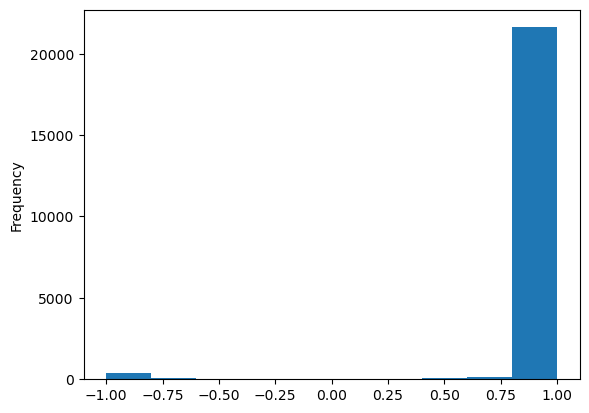

In [14]:
%matplotlib inline
df_vaderized1['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

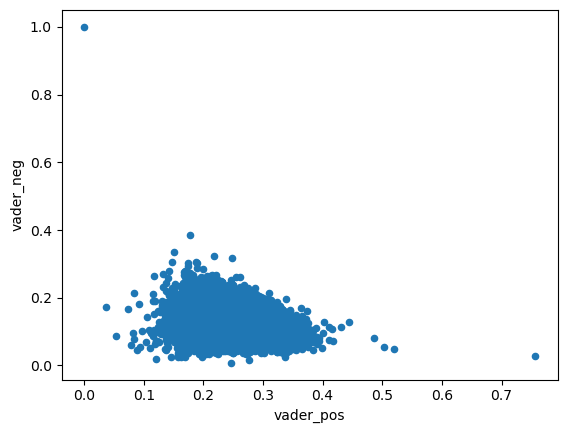

In [15]:
df_vaderized1.plot.scatter(x='vader_pos', y = 'vader_neg')

In [16]:
# Compute the sentiment analysis for all of the posts for all personality type = 'INTP'

df_vaderized2 = vaderize(new_pt_df2, 'posts')
df_vaderized2.head()

Estimating polarity scores for 24961 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,watch bite everything include hentai tend enjo...,INTP,0.119,0.553,0.327,0.9992
1,like goal personally appeal probably wrong see...,INTP,0.154,0.604,0.242,0.9946
2,fill unfortunately read habit want learn prefe...,INTP,0.144,0.624,0.232,0.9955
3,people idea reason enjoy leadership role like ...,INTP,0.105,0.569,0.327,0.9993
4,state grievance ego lack skill find polarize w...,INTP,0.163,0.593,0.244,0.9903


<AxesSubplot:ylabel='Frequency'>

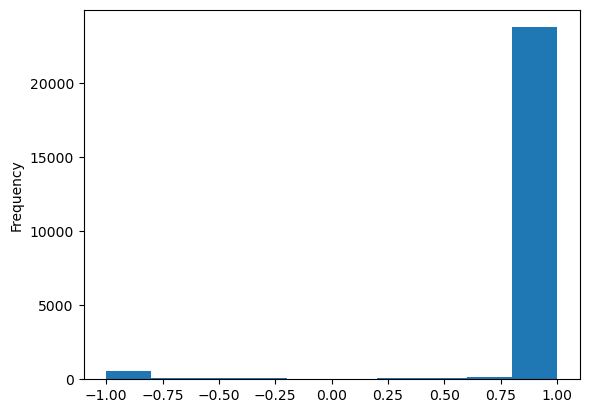

In [17]:
%matplotlib inline
df_vaderized2['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

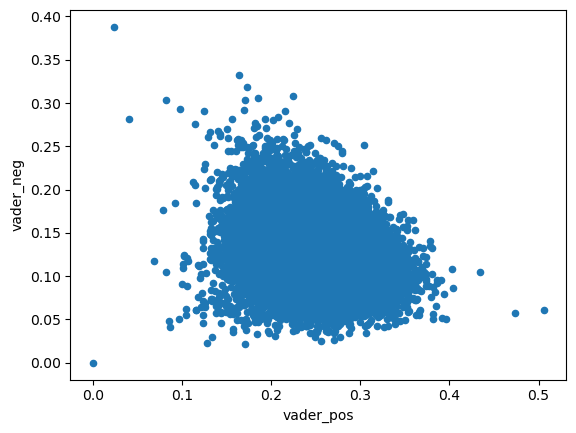

In [18]:
df_vaderized2.plot.scatter(x='vader_pos', y = 'vader_neg')

In [19]:
# Compute the sentiment analysis for all of the posts for all personality type = 'ISFJ'

df_vaderized3 = vaderize(new_pt_df3, 'posts')
df_vaderized3.head()

Estimating polarity scores for 650 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,like spring feel energetic season whatever rea...,ISFJ,0.122,0.610,0.268,0.9980
1,ridiculous like stress angry think straight ge...,ISFJ,0.081,0.592,0.327,0.9994
2,call muiple people bid save face slowly realiz...,ISFJ,0.107,0.617,0.276,0.9985
3,talk etc end coworkers friend ask hang day rea...,ISFJ,0.141,0.608,0.251,0.9970
4,ive try learn pick feel apart constantly like ...,ISFJ,0.151,0.515,0.334,0.9988


<AxesSubplot:ylabel='Frequency'>

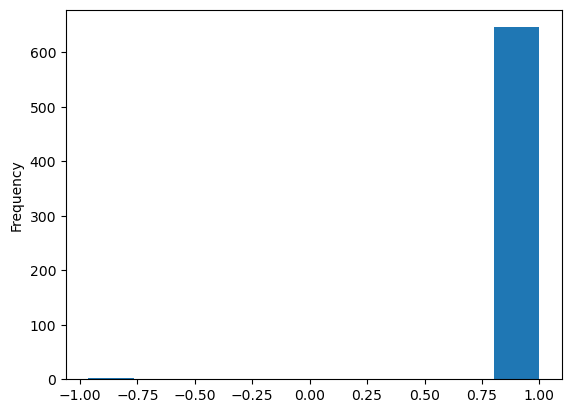

In [20]:
%matplotlib inline
df_vaderized3['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

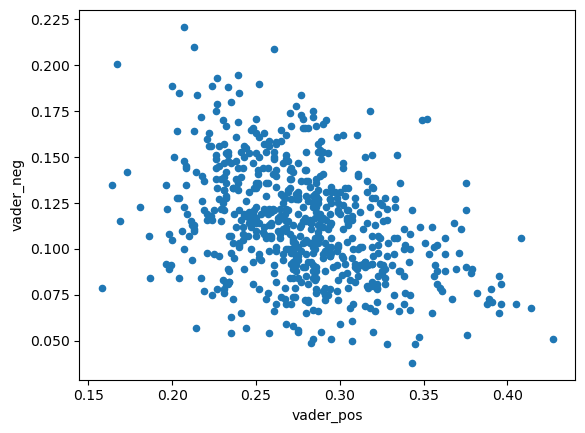

In [21]:
df_vaderized3.plot.scatter(x='vader_pos', y = 'vader_neg')

In [22]:
# Compute the sentiment analysis for all of the posts for all personality type = 'ISFP'

df_vaderized4 = vaderize(new_pt_df4, 'posts')
df_vaderized4.head()

Estimating polarity scores for 875 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,shut fuck motherfucker call dumb would agree b...,ISFP,0.094,0.598,0.309,0.9990
1,fis try hard fake make people win treat fragil...,ISFP,0.124,0.582,0.293,0.9986
2,way sleep night one thing parent teacher right...,ISFP,0.144,0.632,0.224,0.9913
3,predict correctly really matter right wrong on...,ISFP,0.074,0.618,0.308,0.9992
4,place make one detail replace surprise infjs m...,ISFP,0.079,0.650,0.271,0.9989


<AxesSubplot:ylabel='Frequency'>

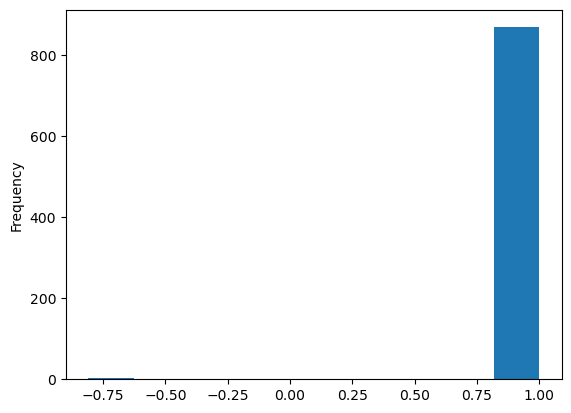

In [23]:
%matplotlib inline
df_vaderized4['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

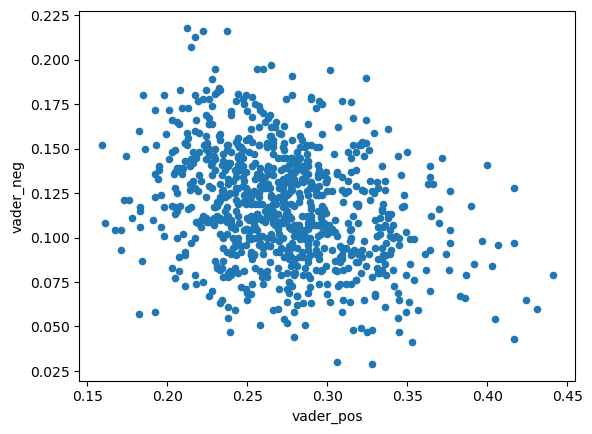

In [24]:
df_vaderized4.plot.scatter(x='vader_pos', y = 'vader_neg')

In [25]:
# Compute the sentiment analysis for all of the posts for all personality type = 'ISTJ'

df_vaderized5 = vaderize(new_pt_df5, 'posts')
df_vaderized5.head()

Estimating polarity scores for 1243 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,want create entj isfj one lolz please let star...,ISTJ,0.139,0.606,0.256,0.9970
1,click bias obviously definitely learn play gui...,ISTJ,0.115,0.599,0.286,0.9988
2,description actually istps though also see unn...,ISTJ,0.091,0.663,0.246,0.9982
3,interest story take couple paragraph warm some...,ISTJ,0.113,0.652,0.235,0.9962
4,righteous however even flaw one perfect every ...,ISTJ,0.116,0.605,0.279,0.9985


<AxesSubplot:ylabel='Frequency'>

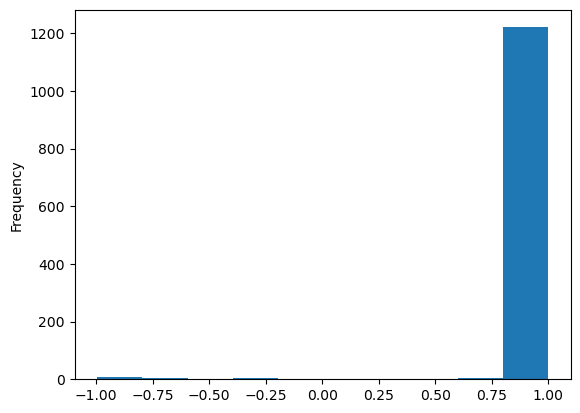

In [26]:
%matplotlib inline
df_vaderized5['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

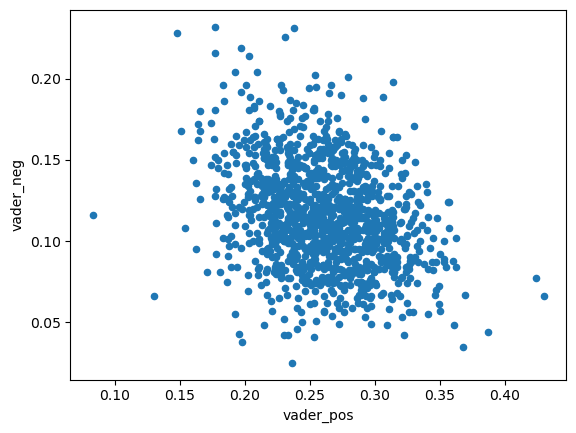

In [27]:
df_vaderized5.plot.scatter(x='vader_pos', y = 'vader_neg')

In [28]:
# Compute the sentiment analysis for all of the posts for all personality type = 'ISTP'

df_vaderized6 = vaderize(new_pt_df6, 'posts')
df_vaderized6.head()

Estimating polarity scores for 3424 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,add google define djective cheerful friendly j...,ISTP,0.114,0.682,0.204,0.9939
1,resource africa middle east superpower player ...,ISTP,0.174,0.604,0.222,0.9714
2,honestly love discus fine point medium creator...,ISTP,0.126,0.630,0.244,0.9971
3,weak point allow one find fix course person si...,ISTP,0.105,0.651,0.244,0.9979
4,accurate actually meh religion important nope ...,ISTP,0.133,0.657,0.210,0.9937


<AxesSubplot:ylabel='Frequency'>

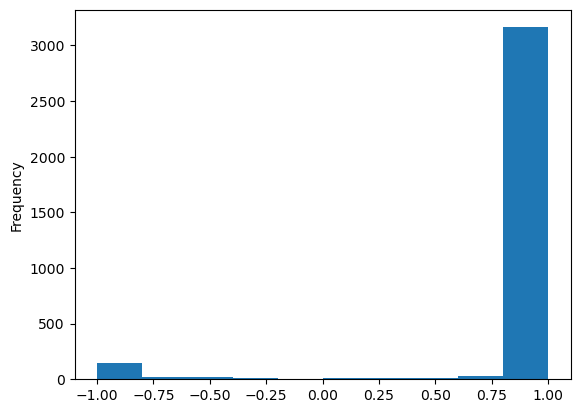

In [29]:
%matplotlib inline
df_vaderized6['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

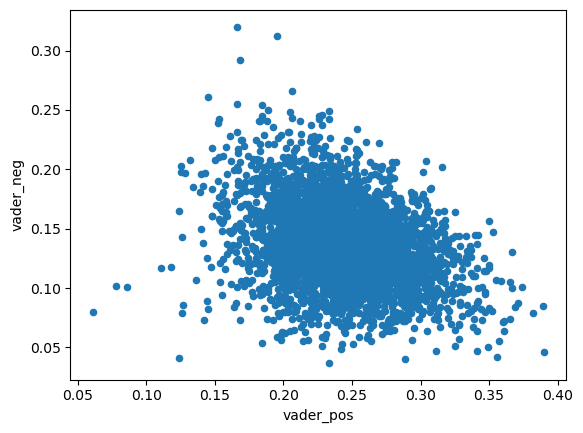

In [30]:
df_vaderized6.plot.scatter(x='vader_pos', y = 'vader_neg')

In [31]:
# Compute the sentiment analysis for all of the posts for all personality type = 'ENFJ'

df_vaderized7 = vaderize(new_pt_df7, 'posts')
df_vaderized7.head()

Estimating polarity scores for 1534 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,yeah quite like idea actually think could numb...,ENFJ,0.125,0.546,0.329,0.9991
1,idea thing thing value others perceive relevan...,ENFJ,0.134,0.599,0.267,0.9977
2,respect say year sound bite silly might soft r...,ENFJ,0.060,0.637,0.303,0.9993
3,interaction unavoidable witness student intern...,ENFJ,0.101,0.630,0.269,0.9981
4,core probably see relationship work also sound...,ENFJ,0.111,0.521,0.368,0.9995


<AxesSubplot:ylabel='Frequency'>

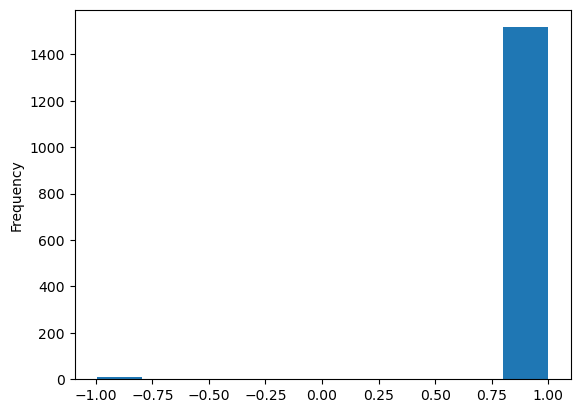

In [32]:
%matplotlib inline
df_vaderized7['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

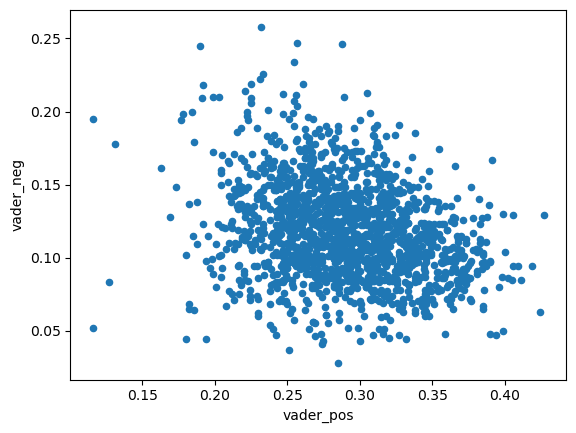

In [33]:
df_vaderized7.plot.scatter(x='vader_pos', y = 'vader_neg')

In [34]:
# Compute the sentiment analysis for all of the posts for all personality type = 'ENFP'

df_vaderized8 = vaderize(new_pt_df8, 'posts')
df_vaderized8.head()

Estimating polarity scores for 6167 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,terminal chance affirmation quality touch firs...,ENFP,0.200,0.542,0.258,0.9882
1,walk field knee high golden stalk afternoon no...,ENFP,0.111,0.567,0.322,0.9992
2,idea mattet point regularly check mind ser evo...,ENFP,0.126,0.626,0.248,0.9973
3,know even u even accidentally fall love proces...,ENFP,0.131,0.592,0.277,0.9979
4,hour suck make sure get skate dribble ball lun...,ENFP,0.124,0.618,0.258,0.9976


<AxesSubplot:ylabel='Frequency'>

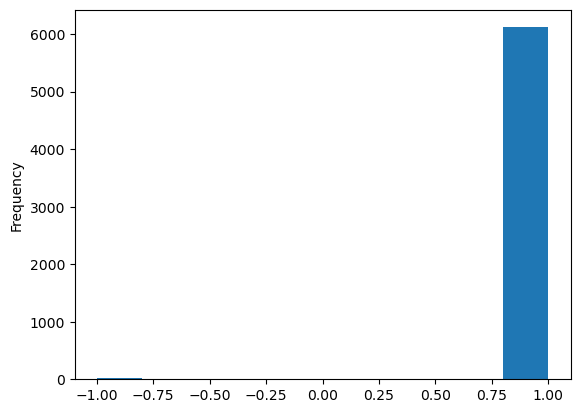

In [35]:
%matplotlib inline
df_vaderized8['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

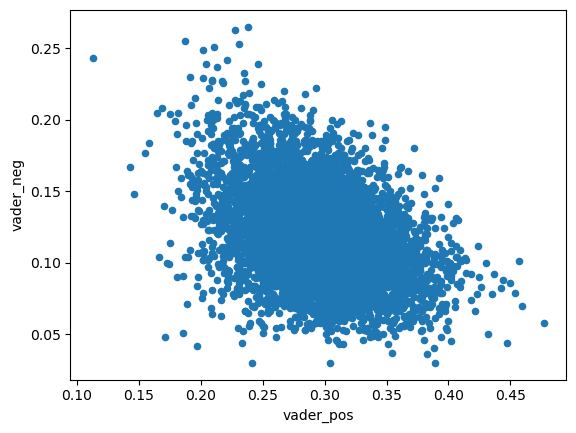

In [36]:
df_vaderized8.plot.scatter(x='vader_pos', y = 'vader_neg')

In [37]:
# Compute the sentiment analysis for all of the posts for all personality type = 'ENTJ'

df_vaderized9 = vaderize(new_pt_df9, 'posts')
df_vaderized9.head()

Estimating polarity scores for 2955 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,well consider freud consider father psychoanal...,ENTJ,0.114,0.661,0.225,0.9967
1,beside point advice mourn get right back let d...,ENTJ,0.097,0.571,0.332,0.9993
2,slow date month marriage even officially two d...,ENTJ,0.081,0.568,0.350,0.9995
3,sub prepare receive kind response anyway still...,ENTJ,0.107,0.599,0.293,0.9988
4,validation energy best revenge detach success ...,ENTJ,0.109,0.613,0.278,0.9984


<AxesSubplot:ylabel='Frequency'>

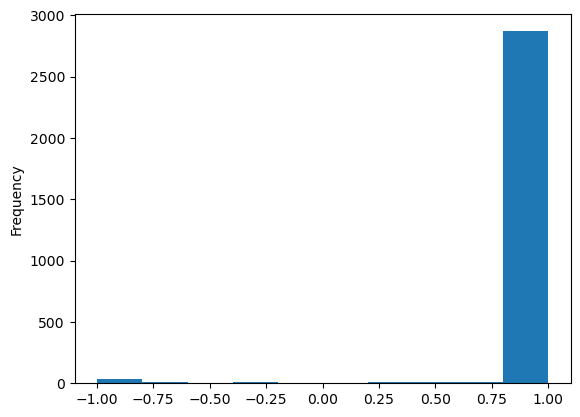

In [38]:
%matplotlib inline
df_vaderized9['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

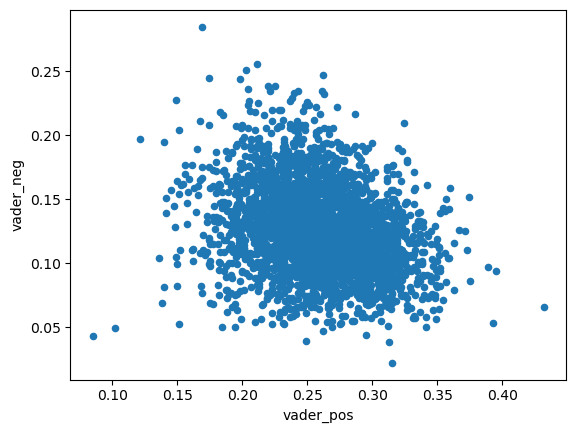

In [39]:
df_vaderized9.plot.scatter(x='vader_pos', y = 'vader_neg')

In [40]:
# Compute the sentiment analysis for all of the posts for all personality type = 'ENTP'

df_vaderized10 = vaderize(new_pt_df10, 'posts')
df_vaderized10.head()

Estimating polarity scores for 11725 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,much easy understand consider people automobil...,ENTP,0.090,0.624,0.286,0.9988
1,think dominant ne search possibility ti try cr...,ENTP,0.124,0.685,0.191,0.9912
2,decide push add bite grass rub leg move slow b...,ENTP,0.069,0.728,0.203,0.9971
3,harsh outspoken fi make fi comfortable dance a...,ENTP,0.157,0.638,0.205,0.9808
4,great consuancy similar type job hop project p...,ENTP,0.115,0.682,0.203,0.9942


<AxesSubplot:ylabel='Frequency'>

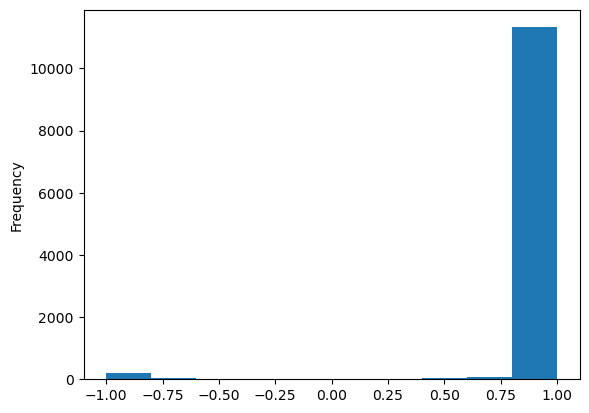

In [41]:
%matplotlib inline
df_vaderized10['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

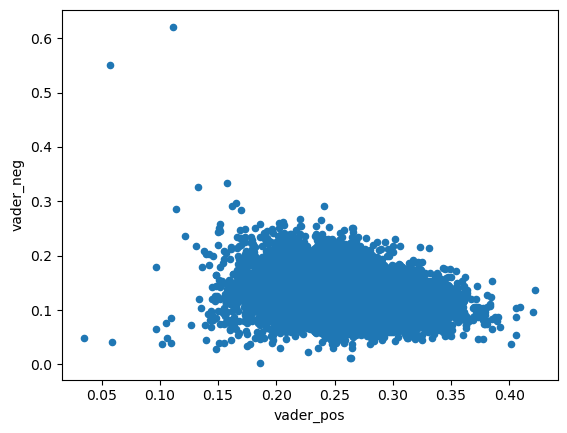

In [42]:
df_vaderized10.plot.scatter(x='vader_pos', y = 'vader_neg')

In [43]:
# Compute the sentiment analysis for all of the posts for all personality type = 'ESFJ'

df_vaderized11 = vaderize(new_pt_df11, 'posts')
df_vaderized11.head()

Estimating polarity scores for 181 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,late whatever make others happy bad feel world...,ESFJ,0.155,0.569,0.276,0.9979
1,thank mom isfj dad istj opinion valid basis ca...,ESFJ,0.101,0.614,0.285,0.9988
2,type really apply infps positive experience ty...,ESFJ,0.130,0.607,0.263,0.9979
3,nd rd strong type long term way love especiall...,ESFJ,0.101,0.625,0.274,0.9988
4,judgment situation may bite bias base lol sure...,ESFJ,0.118,0.613,0.269,0.9984


<AxesSubplot:ylabel='Frequency'>

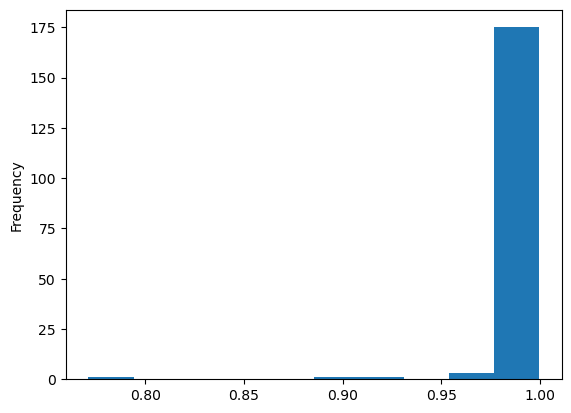

In [44]:
%matplotlib inline
df_vaderized11['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

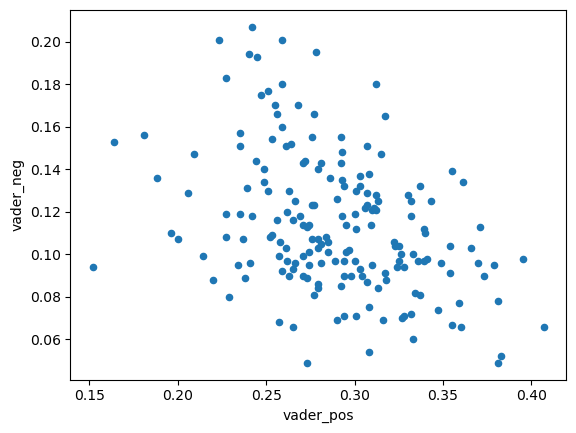

In [45]:
df_vaderized11.plot.scatter(x='vader_pos', y = 'vader_neg')

In [46]:
# Compute the sentiment analysis for all of the posts for all personality type = 'ESFP'

df_vaderized12 = vaderize(new_pt_df12, 'posts')
df_vaderized12.head()

Estimating polarity scores for 360 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,someone grow istp dad yes definitely end well ...,ESFP,0.105,0.669,0.226,0.9963
1,read people intention edit add link expand com...,ESFP,0.070,0.655,0.275,0.9989
2,toward estp steal sevenere phrase present info...,ESFP,0.098,0.584,0.318,0.9991
3,marie curie nothing life fear understand feynm...,ESFP,0.133,0.613,0.254,0.9973
4,gonna lie female thought personally fuck cut n...,ESFP,0.130,0.622,0.248,0.9968


<AxesSubplot:ylabel='Frequency'>

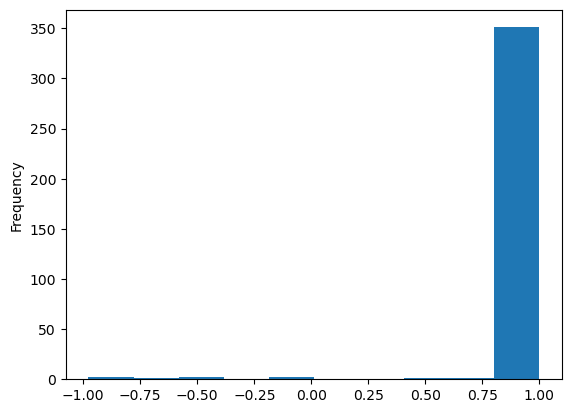

In [47]:
%matplotlib inline
df_vaderized12['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

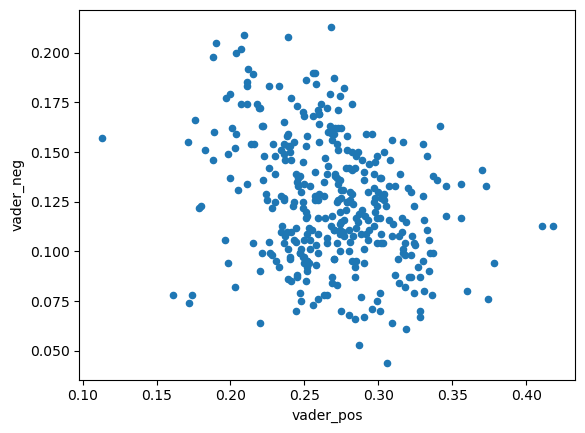

In [48]:
df_vaderized12.plot.scatter(x='vader_pos', y = 'vader_neg')

In [49]:
# Compute the sentiment analysis for all of the posts for all personality type = 'ESTJ'

df_vaderized13 = vaderize(new_pt_df13, 'posts')
df_vaderized13.head()

Estimating polarity scores for 482 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,interest question well dress jean crop sunny w...,ESTJ,0.059,0.691,0.250,0.9986
1,jeg forstår ikke hvorfor vi skulle så meget im...,ESTJ,0.086,0.689,0.225,0.9977
2,enjoy large group friend want blend crowd joke...,ESTJ,0.177,0.636,0.188,0.7915
3,conversation kinect camera support k webcam su...,ESTJ,0.107,0.654,0.238,0.9976
4,definitely give managerial get shit get fuck v...,ESTJ,0.169,0.615,0.217,0.9766


<AxesSubplot:ylabel='Frequency'>

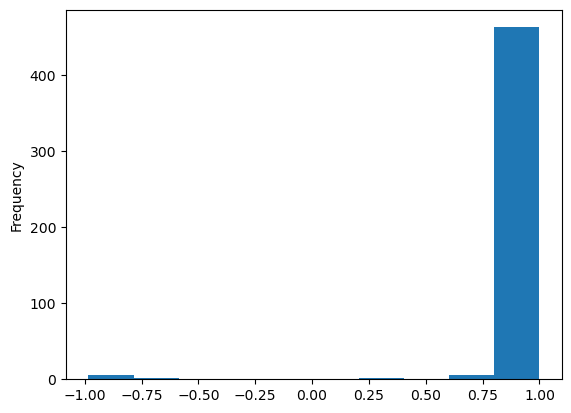

In [50]:
%matplotlib inline
df_vaderized13['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

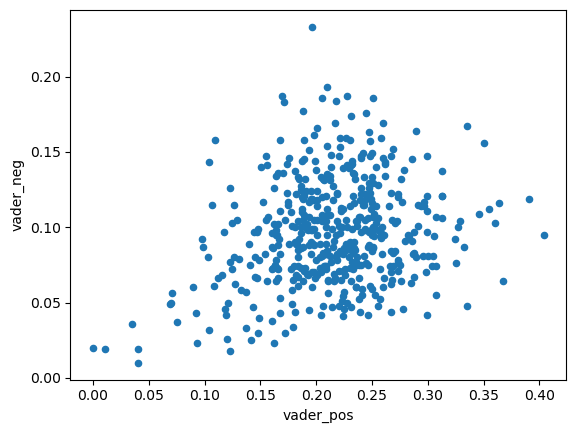

In [51]:
df_vaderized13.plot.scatter(x='vader_pos', y = 'vader_neg')

In [52]:
# Compute the sentiment analysis for all of the posts for all personality type = 'ESTP'

df_vaderized14 = vaderize(new_pt_df14, 'posts')
df_vaderized14.head()

Estimating polarity scores for 1986 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,think hear slight northern german mix little b...,ESTP,0.112,0.643,0.244,0.9970
1,alone also distinct difference notice nuanced ...,ESTP,0.164,0.639,0.197,0.9481
2,house gif guy come pick host get cupboard flic...,ESTP,0.102,0.656,0.242,0.9976
3,situation red bus pick drop circle park yes wo...,ESTP,0.155,0.653,0.192,0.9575
4,post pretty well know eastern european even pc...,ESTP,0.147,0.629,0.225,0.9922


<AxesSubplot:ylabel='Frequency'>

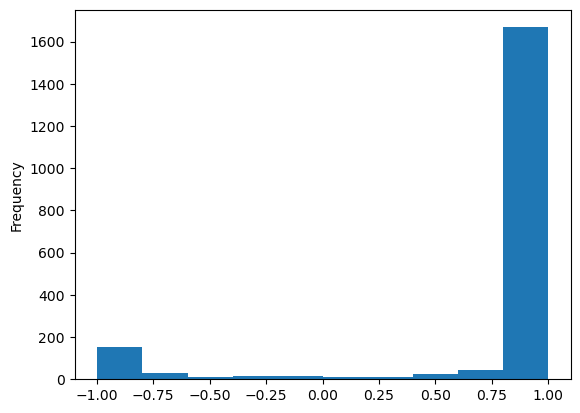

In [53]:
%matplotlib inline
df_vaderized14['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

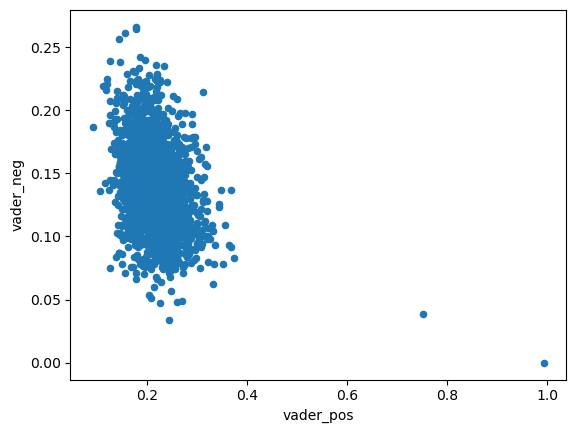

In [54]:
df_vaderized14.plot.scatter(x='vader_pos', y = 'vader_neg')

In [55]:
# Compute the sentiment analysis for all of the posts for all personality type = 'INFJ'

df_vaderized15 = vaderize(new_pt_df15, 'posts')
df_vaderized15.head()

Estimating polarity scores for 14963 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,help moment hobby keep mind busy like look dep...,INFJ,0.213,0.492,0.295,0.9950
1,suicide take word try alert someone situation ...,INFJ,0.101,0.562,0.337,0.9993
2,use strat number go guitar interest thank warn...,INFJ,0.146,0.589,0.265,0.9971
3,know stand someone frustrate start think win l...,INFJ,0.092,0.603,0.305,0.9990
4,one two close people always careful reciprocat...,INFJ,0.097,0.653,0.251,0.9982


<AxesSubplot:ylabel='Frequency'>

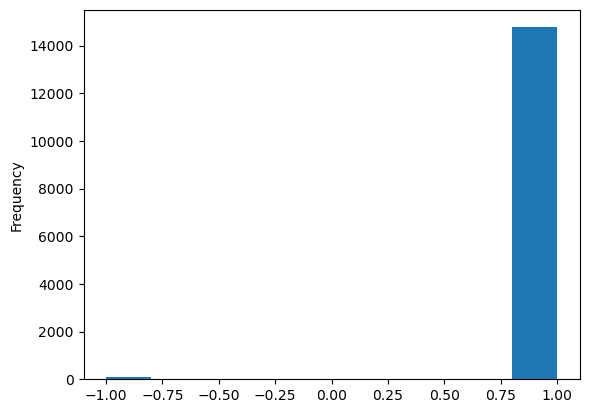

In [56]:
%matplotlib inline
df_vaderized15['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

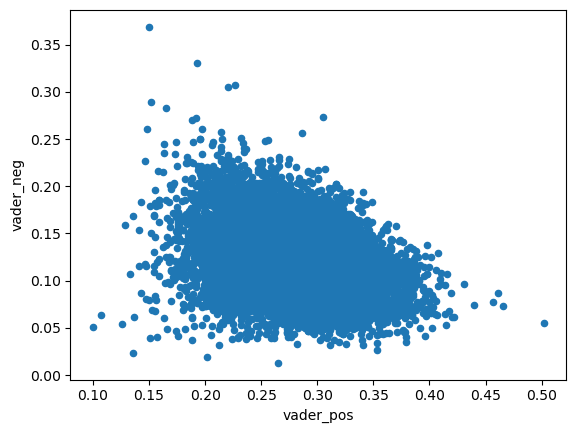

In [57]:
df_vaderized15.plot.scatter(x='vader_pos', y = 'vader_neg')

In [58]:
# Compute the sentiment analysis for all of the posts for all personality type = 'INFP'

df_vaderized16 = vaderize(new_pt_df16, 'posts')
df_vaderized16.head()

Estimating polarity scores for 12134 cases.


,posts,type,vader_neg,vader_neu,vader_pos,vader_compound
0,feel must really miss importance cognitive fun...,INFP,0.157,0.587,0.256,0.9969
1,strategic role play would say damn equivalent ...,INFP,0.143,0.538,0.319,0.9988
2,recognize much comment cannot break people eit...,INFP,0.068,0.639,0.292,0.9992
3,small project fit large piece show part make d...,INFP,0.117,0.628,0.255,0.9975
4,battle rough last six month someone push frien...,INFP,0.153,0.615,0.232,0.9932


<AxesSubplot:ylabel='Frequency'>

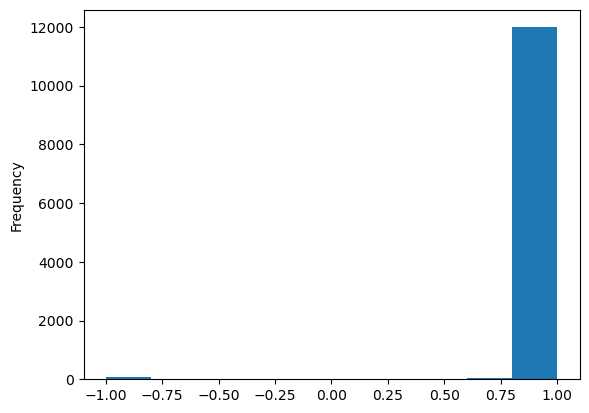

In [59]:
%matplotlib inline
df_vaderized16['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

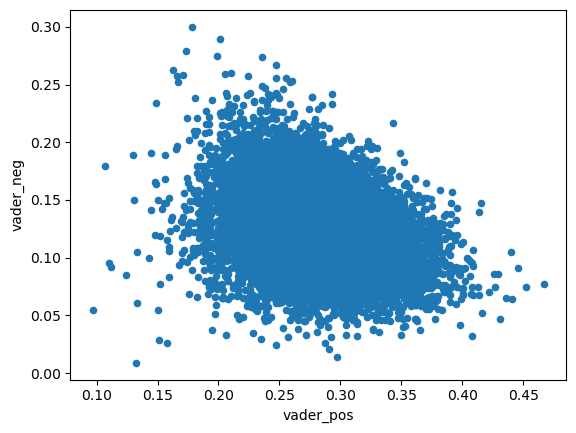

In [60]:
df_vaderized16.plot.scatter(x='vader_pos', y = 'vader_neg')

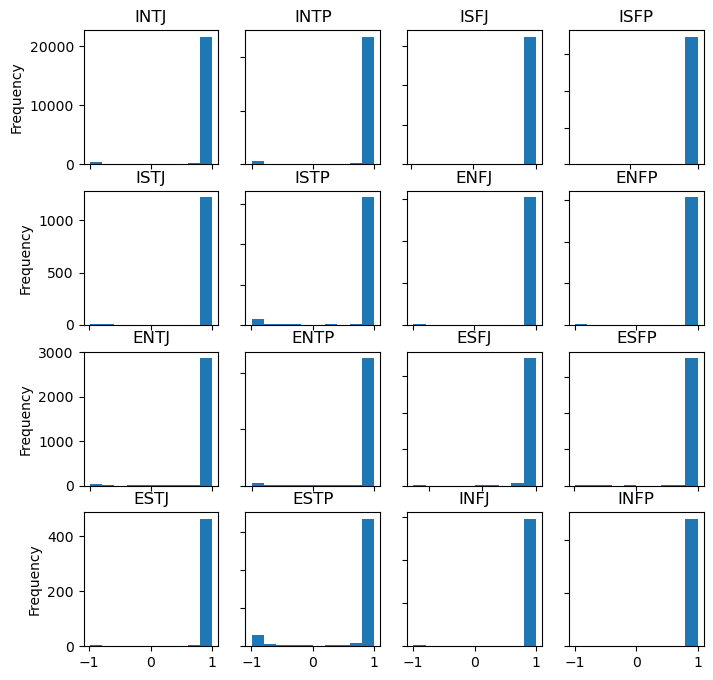

In [61]:
# Graph all the histograms representing all 16 personality types.
%matplotlib inline
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
df_vaderized1['vader_compound'].plot(kind='hist', ax=axes[0,0]); axes[0,0].set_title('INTJ');
df_vaderized2['vader_compound'].plot(kind='hist', ax=axes[0,1]); axes[0,1].set_title('INTP');
df_vaderized3['vader_compound'].plot(kind='hist', ax=axes[0,2]); axes[0,2].set_title('ISFJ');
df_vaderized4['vader_compound'].plot(kind='hist', ax=axes[0,3]); axes[0,3].set_title('ISFP');

df_vaderized5['vader_compound'].plot(kind='hist', ax=axes[1,0]); axes[1,0].set_title('ISTJ');
df_vaderized6['vader_compound'].plot(kind='hist', ax=axes[1,1]); axes[1,1].set_title('ISTP');
df_vaderized7['vader_compound'].plot(kind='hist', ax=axes[1,2]); axes[1,2].set_title('ENFJ');
df_vaderized8['vader_compound'].plot(kind='hist', ax=axes[1,3]); axes[1,3].set_title('ENFP');

df_vaderized9['vader_compound'].plot(kind='hist', ax=axes[2,0]); axes[2,0].set_title('ENTJ');
df_vaderized10['vader_compound'].plot(kind='hist', ax=axes[2,1]); axes[2,1].set_title('ENTP');
df_vaderized11['vader_compound'].plot(kind='hist', ax=axes[2,2]); axes[2,2].set_title('ESFJ');
df_vaderized12['vader_compound'].plot(kind='hist', ax=axes[2,3]); axes[2,3].set_title('ESFP');

df_vaderized13['vader_compound'].plot(kind='hist', ax=axes[3,0]); axes[3,0].set_title('ESTJ');
df_vaderized14['vader_compound'].plot(kind='hist', ax=axes[3,1]); axes[3,1].set_title('ESTP');
df_vaderized15['vader_compound'].plot(kind='hist', ax=axes[3,2]); axes[3,2].set_title('INFJ');
df_vaderized16['vader_compound'].plot(kind='hist', ax=axes[3,3]); axes[3,3].set_title('INFP');

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()

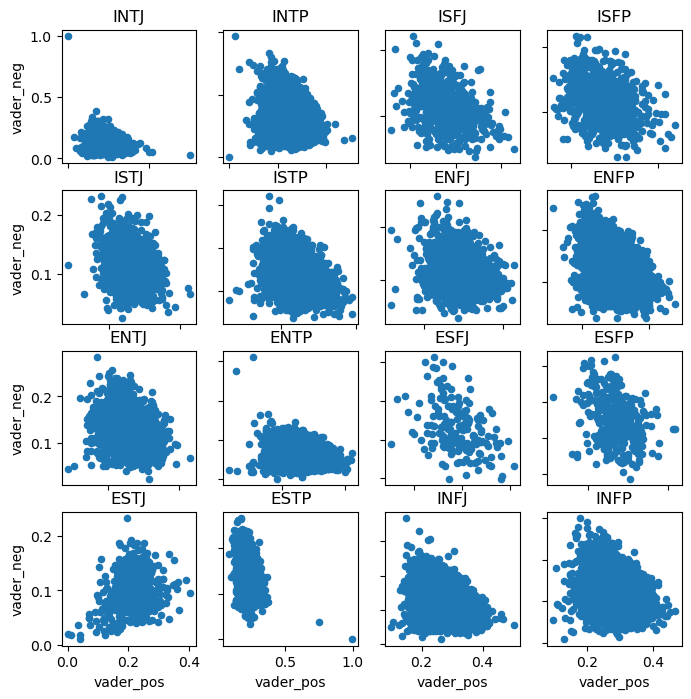

In [62]:
# Graph all the scatter plots representing all 16 personality types.
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
df_vaderized1.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[0,0]); axes[0,0].set_title('INTJ');
df_vaderized2.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[0,1]); axes[0,1].set_title('INTP');
df_vaderized3.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[0,2]); axes[0,2].set_title('ISFJ');
df_vaderized4.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[0,3]); axes[0,3].set_title('ISFP');

df_vaderized5.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[1,0]); axes[1,0].set_title('ISTJ');
df_vaderized6.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[1,1]); axes[1,1].set_title('ISTP');
df_vaderized7.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[1,2]); axes[1,2].set_title('ENFJ');
df_vaderized8.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[1,3]); axes[1,3].set_title('ENFP');

df_vaderized9.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[2,0]); axes[2,0].set_title('ENTJ');
df_vaderized10.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[2,1]); axes[2,1].set_title('ENTP');
df_vaderized11.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[2,2]); axes[2,2].set_title('ESFJ');
df_vaderized12.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[2,3]); axes[2,3].set_title('ESFP');

df_vaderized13.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[3,0]); axes[3,0].set_title('ESTJ');
df_vaderized14.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[3,1]); axes[3,1].set_title('ESTP');
df_vaderized15.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[3,2]); axes[3,2].set_title('INFJ');
df_vaderized16.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[3,3]); axes[3,3].set_title('INFP');

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()

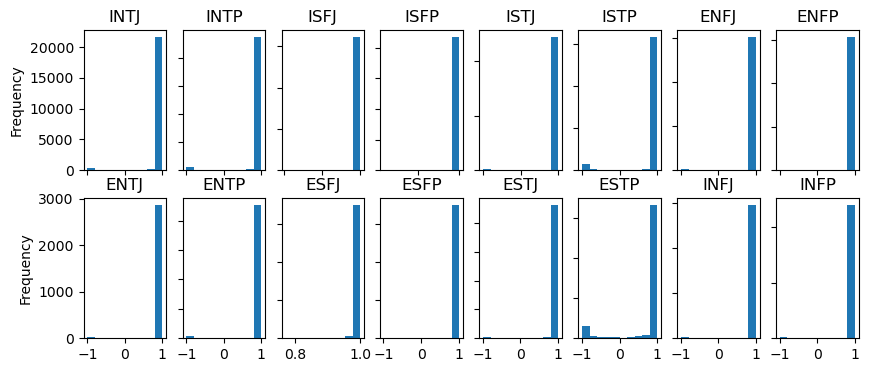

In [63]:
# Graph all the histograms representing all 16 personality types.
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(10,4))
df_vaderized1['vader_compound'].plot(kind='hist', ax=axes[0,0]); axes[0,0].set_title('INTJ');
df_vaderized2['vader_compound'].plot(kind='hist', ax=axes[0,1]); axes[0,1].set_title('INTP');
df_vaderized3['vader_compound'].plot(kind='hist', ax=axes[0,2]); axes[0,2].set_title('ISFJ');
df_vaderized4['vader_compound'].plot(kind='hist', ax=axes[0,3]); axes[0,3].set_title('ISFP');
df_vaderized5['vader_compound'].plot(kind='hist', ax=axes[0,4]); axes[0,4].set_title('ISTJ');
df_vaderized6['vader_compound'].plot(kind='hist', ax=axes[0,5]); axes[0,5].set_title('ISTP');
df_vaderized7['vader_compound'].plot(kind='hist', ax=axes[0,6]); axes[0,6].set_title('ENFJ');
df_vaderized8['vader_compound'].plot(kind='hist', ax=axes[0,7]); axes[0,7].set_title('ENFP');

df_vaderized9['vader_compound'].plot(kind='hist', ax=axes[1,0]); axes[1,0].set_title('ENTJ');
df_vaderized10['vader_compound'].plot(kind='hist', ax=axes[1,1]); axes[1,1].set_title('ENTP');
df_vaderized11['vader_compound'].plot(kind='hist', ax=axes[1,2]); axes[1,2].set_title('ESFJ');
df_vaderized12['vader_compound'].plot(kind='hist', ax=axes[1,3]); axes[1,3].set_title('ESFP');
df_vaderized13['vader_compound'].plot(kind='hist', ax=axes[1,4]); axes[1,4].set_title('ESTJ');
df_vaderized14['vader_compound'].plot(kind='hist', ax=axes[1,5]); axes[1,5].set_title('ESTP');
df_vaderized15['vader_compound'].plot(kind='hist', ax=axes[1,6]); axes[1,6].set_title('INFJ');
df_vaderized16['vader_compound'].plot(kind='hist', ax=axes[1,7]); axes[1,7].set_title('INFP');

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()

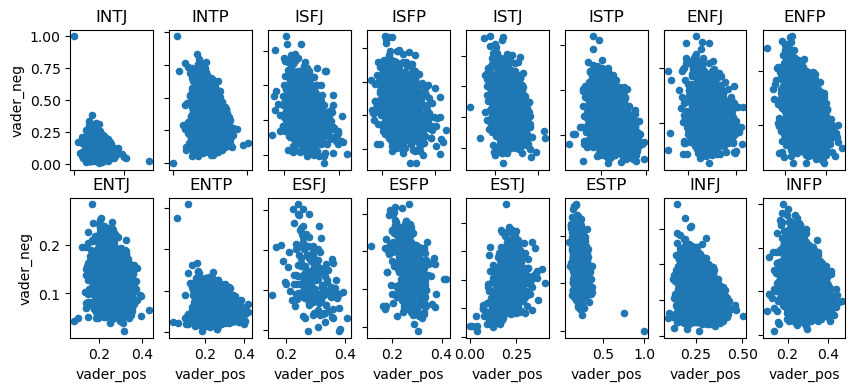

In [64]:
# Graph all the scatter plots representing all 16 personality types.
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(10,4))
df_vaderized1.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[0,0]); axes[0,0].set_title('INTJ');
df_vaderized2.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[0,1]); axes[0,1].set_title('INTP');
df_vaderized3.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[0,2]); axes[0,2].set_title('ISFJ');
df_vaderized4.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[0,3]); axes[0,3].set_title('ISFP');
df_vaderized5.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[0,4]); axes[0,4].set_title('ISTJ');
df_vaderized6.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[0,5]); axes[0,5].set_title('ISTP');
df_vaderized7.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[0,6]); axes[0,6].set_title('ENFJ');
df_vaderized8.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[0,7]); axes[0,7].set_title('ENFP');

df_vaderized9.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[1,0]); axes[1,0].set_title('ENTJ');
df_vaderized10.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[1,1]); axes[1,1].set_title('ENTP');
df_vaderized11.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[1,2]); axes[1,2].set_title('ESFJ');
df_vaderized12.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[1,3]); axes[1,3].set_title('ESFP');
df_vaderized13.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[1,4]); axes[1,4].set_title('ESTJ');
df_vaderized14.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[1,5]); axes[1,5].set_title('ESTP');
df_vaderized15.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[1,6]); axes[1,6].set_title('INFJ');
df_vaderized16.plot(x='vader_pos', y='vader_neg', kind='scatter', ax=axes[1,7]); axes[1,7].set_title('INFP');

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()

In [65]:
# Testing RAKE
from rake_nltk import Rake

# Uses stopwords for english from NLTK, and all puntuation characters by
# default
r = Rake()

In [66]:
# RAKE
# Construct new dataframe for each 16 personality types to add additional column with the sentiment score for each post.

import pandas as pd1

df_for_rake = pd1.read_csv('MBTI 500.csv')

# Get the unique list of personality types from the dataset.
personality_types_for_rake = df_for_rake['type'].unique()

# One dataframe will be created for each personality type found in the dataset.
df1_for_rake = df_for_rake[df_for_rake['type'] == 'INTJ']
df2_for_rake = df_for_rake[df_for_rake['type'] == 'INTP']
df3_for_rake = df_for_rake[df_for_rake['type'] == 'ISFJ']
df4_for_rake = df_for_rake[df_for_rake['type'] == 'ISFP']
df5_for_rake = df_for_rake[df_for_rake['type'] == 'ISTJ']
df6_for_rake = df_for_rake[df_for_rake['type'] == 'ISTP']
df7_for_rake = df_for_rake[df_for_rake['type'] == 'ENFJ']
df8_for_rake = df_for_rake[df_for_rake['type'] == 'ENFP']
df9_for_rake = df_for_rake[df_for_rake['type'] == 'ENTJ']
df10_for_rake = df_for_rake[df_for_rake['type'] == 'ENTP']
df11_for_rake = df_for_rake[df_for_rake['type'] == 'ESFJ']
df12_for_rake = df_for_rake[df_for_rake['type'] == 'ESFP']
df13_for_rake = df_for_rake[df_for_rake['type'] == 'ESTJ']
df14_for_rake = df_for_rake[df_for_rake['type'] == 'ESTP']
df15_for_rake = df_for_rake[df_for_rake['type'] == 'INFJ']
df16_for_rake = df_for_rake[df_for_rake['type'] == 'INFP']

In [67]:
series_list = []

def new_series_for_df(dfsize):
    i = 0
    series_list = []
    for i in range(dfsize):
        series_list.append(i)
    return series_list

new_index_series_list = pd1.Series(new_series_for_df(len(df1_for_rake)))
df1_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df2_for_rake)))
df2_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df3_for_rake)))
df3_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df4_for_rake)))
df4_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df5_for_rake)))
df5_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df6_for_rake)))
df6_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df7_for_rake)))
df7_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df8_for_rake)))
df8_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df9_for_rake)))
df9_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df10_for_rake)))
df10_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df11_for_rake)))
df11_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df12_for_rake)))
df12_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df13_for_rake)))
df13_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df14_for_rake)))
df14_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df15_for_rake)))
df15_for_rake.set_index(new_index_series_list, inplace=True)
new_index_series_list = pd1.Series(new_series_for_df(len(df16_for_rake)))
df16_for_rake.set_index(new_index_series_list, inplace=True)
df16_for_rake.head()

,posts,type
0,feel must really miss importance cognitive fun...,INFP
1,strategic role play would say damn equivalent ...,INFP
2,recognize much comment cannot break people eit...,INFP
3,small project fit large piece show part make d...,INFP
4,battle rough last six month someone push frien...,INFP


In [68]:
# Compute the RAKE for all of the posts for all 16 personality types for whole dataset.
from rake_nltk import Rake

str(df1_for_rake.iloc[0,0])

'know intj tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad intj u stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like u specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low sw

In [69]:
#REVISED METHOD TO GET MOST COMMON WORDS FROM DATAFRAME (INSTEAD OF USING 'RAKE')
#
# word count are min 1 to max 175 
import pandas as pd
# Identify most common words
common = pd.Series(' '.join(df1_for_rake['posts']).split()).value_counts()[:50]
common

like          135640
people        120377
think         115526
get           110973
make           85593
thing          85017
go             78185
one            78050
know           76724
time           76398
good           73470
say            72003
would          71840
feel           64914
want           61105
really         60177
way            55634
intj           55109
work           54906
also           48949
something      48040
see            48034
find           46460
much           46247
try            45930
take           45611
even           43584
need           41983
use            40039
well           40009
type           38307
friend         38264
lot            37131
life           35667
someone        35022
mean           33689
come           33612
could          32442
look           32429
give           31489
talk           31227
person         31100
interest       29667
year           28785
never          28737
though         28681
understand     28466
love         

In [70]:
# Identify most common words
common = pd.Series(' '.join(df16_for_rake['posts']).split()).value_counts()[:10]
common

like      90731
think     72435
people    62125
get       60678
feel      59917
thing     48428
know      46846
make      46628
really    45154
one       44194
dtype: int64

In [71]:
#Identify uncommon words
uncommon = pd.Series(' '.join(df16_for_rake['posts']).split()).value_counts()[-10:]
uncommon

expession        1
subactivities    1
subsports        1
fondess          1
usg              1
hassan           1
microkorg        1
kronos           1
korg             1
ausse            1
dtype: int64